# Photometry Basics Concepts and Units Scratchpad
### This notebook is meant to augment Lecture 1 of Spring Semester Prosem. of the Vision Science PhD program at SUNY College of Optometry
##### by Bonnie Cooper  bcooper@sunyopt.edu
 

## <font color='red'> Photometry: the lumen. a measure of luminous power
## <font color='red'>Radiometry: the watt. a measure of radiant power
At the approximate peak of the luminosity function (~555nm), there are 680 lumens per watt.
let us pretend we have a super efficient diode that only emits 555nm light. We can control the radiant power to increade/decrease the wattage emitted.
Let us calculate lumenous power (lumens)


In [2]:
lumens_per_watt_at555nm = 680 #lumens/watt
RadiantPower_magicDiode = 1 #watts
luminousEfficiency = 1
LuminousPower_magicDiode = RadiantPower_magicDiode*luminousEfficiency*lumens_per_watt_at555nm
print( LuminousPower_magicDiode )

680


### The Luminosity Function describes how the sensitivity of human observers varies as a function of the wavelength of light.
At 650nm, efficiency is 1/10th of that at peak 555nm.
How does this effect the luminous power of light sources?

In [5]:
RadiantPower_magicDiode = 1 #watts
luminousEfficiency = .1
LuminousPower_magicDiode = RadiantPower_magicDiode*luminousEfficiency*lumens_per_watt_at555nm
print( LuminousPower_magicDiode )

68.0


### What is the consequence of the human luminosity functions?
How much more radiant power is required by our 650nm diode to equal the luminous power of the 555nm diode?
![luminosityfxn](https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/Topic3.fig_18.gif)

## <font color='red'>Luminous Power (lumen) vs Luminous Intensity (candela (cd)) vs Luminance (foot-lamberts or candela/m^2)
Luminous power is a nondirectional measure. Luminous intensity refers to the number of lumens produced from a given direction of a light source.
#### 1 candela = lumen/steridian
Luminance is given in foot-lamberts, or more commonly candelas/meter^2
#### 1 foot-lambert = 3.426 cd/m^2

## <font color='red'>Illuminance (lux or foot-candles). The measure of luminous power falling on a surface.
Think of illuminance as the falling rain: it is ignorant of the surface upon which it falls. Many objects in the same environment may fall under the same illuminance and yet have very different luminance and other surfave spectral qualities. You can ask Qasim Zaidi for more on that!

<img src="https://d114hh0cykhyb0.cloudfront.net/assets/2019/03/06203201/FootcandleLuxTable2.jpg" width="400">

## <font color='red'> Inverse Square Law
The illumination of a surface is inversely proportional to the distance of the object to the light source illuminating it. This is the same for luminance/illuminance or radiance/irradiance (We can use the same equation of lumens/m^2 as watts/m^2)
#### E = I/D^2    
    where E = illumination of the surface (lux or foot-candles)
          I = luminous Intensity of the point source (candelas)
          d = distance from the point source to surface
![invSqrLaw](https://media1.britannica.com/eb-media/34/108834-004-B7B1A692.gif)    

In [9]:
d = 4 # meters
I = 1 # watts
E = I/d**2
print( E )

0.0625


## <font color='red'> Let's spend some time with the Luminosity Function

In [26]:
#let's use the pandas python library to import the CIE luminosity function info
#i got this from http://www.cvrl.org/lumindex.htm
#you can work off this code to take a look at other luminosity functions
import pandas as pd
#read the comma seperated value file in to a dataframe
data = pd.read_csv("/home/bonzilla/Documents/dataScienceStuff/logCIE2008v2q_fine.csv")
#show the 1st few values to get an idea of what the data in the file looks like
data.columns = ['wavelength', 'lum_efficiency']
data.head()

,wavelength,lum_efficiency
0,390.1,-3.22077
1,390.2,-3.21248
2,390.3,-3.20419
3,390.4,-3.19591
4,390.5,-3.18764


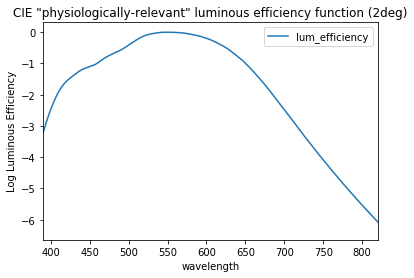

In [59]:
#great! now lets plot...
#let's use the python library matplotlib. there are others like seaborn that might be better, 
#but it's all about perspective
import matplotlib.pyplot as plt
data.plot(kind='line',x='wavelength',y='lum_efficiency')
plt.ylabel('Log Luminous Efficiency')
plt.title('CIE "physiologically-relevant" luminous efficiency function (2deg)')
plt.xlim(390,820)
plt.show()

In [60]:
data = pd.read_csv("/home/bonzilla/Documents/dataScienceStuff/vljve.csv")
#show the 1st few values to get an idea of what the data in the file looks like
data.columns = ['wavelength', 'lum_efficiency']
data.head()

,wavelength,lum_efficiency
0,385,0.000396
1,390,0.000800
2,395,0.001546
3,400,0.002800
4,405,0.004656


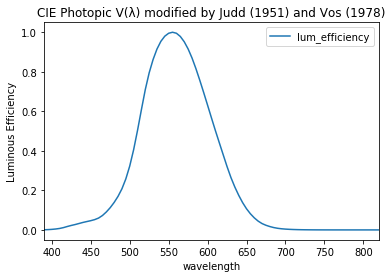

In [61]:
import matplotlib.pyplot as plt
data.plot(kind='line',x='wavelength',y='lum_efficiency')
plt.ylabel('Luminous Efficiency')
plt.title('CIE Photopic V(λ) modified by Judd (1951) and Vos (1978)')
plt.xlim(390,820)
plt.show()

In [69]:
#find the luminou efficiency at a desired wavelength
wavelengthCheck = 666
data.iloc[(data['wavelength']-wavelengthCheck).abs().argsort()[:1]]

,wavelength,lum_efficiency
56,665,0.044327
